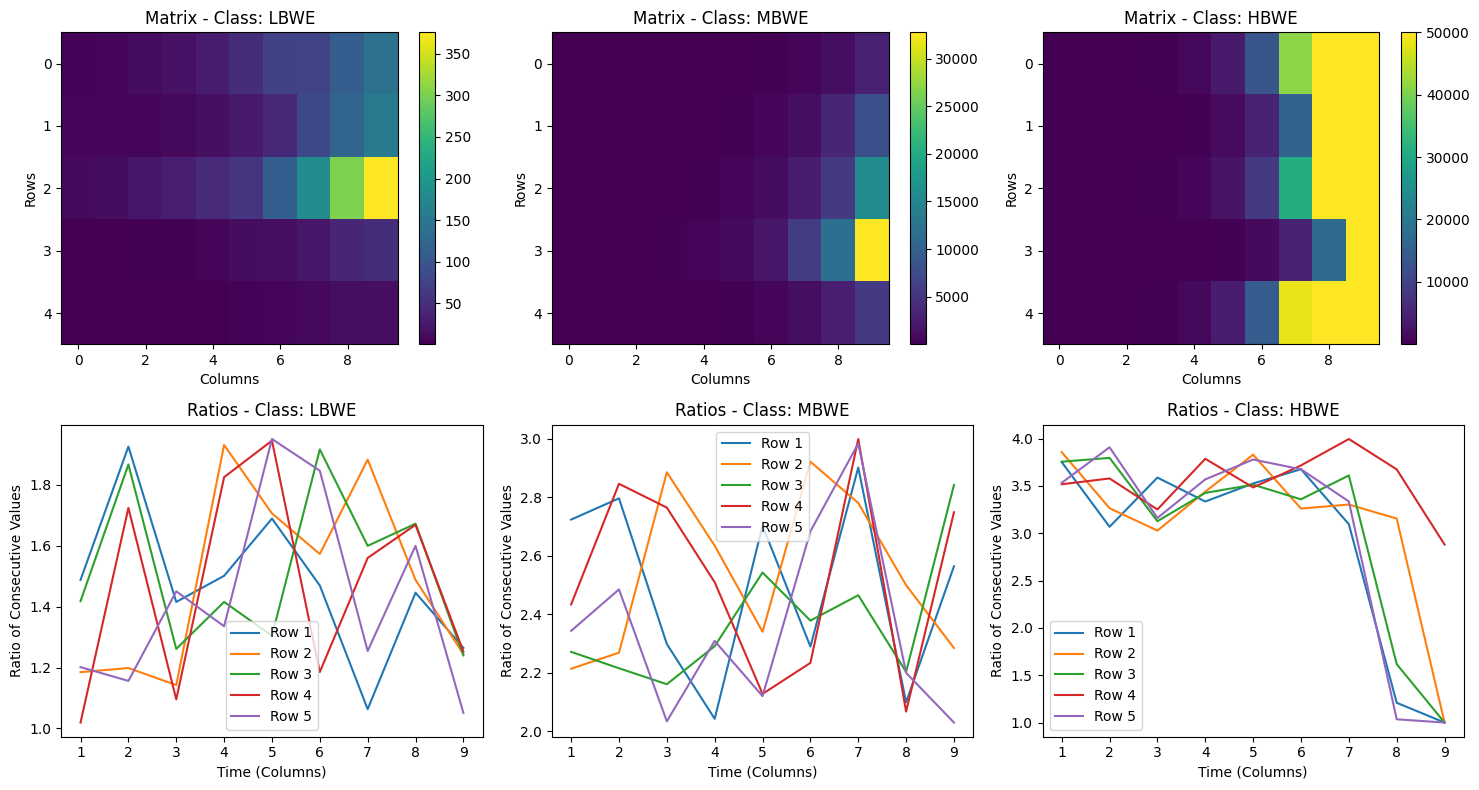

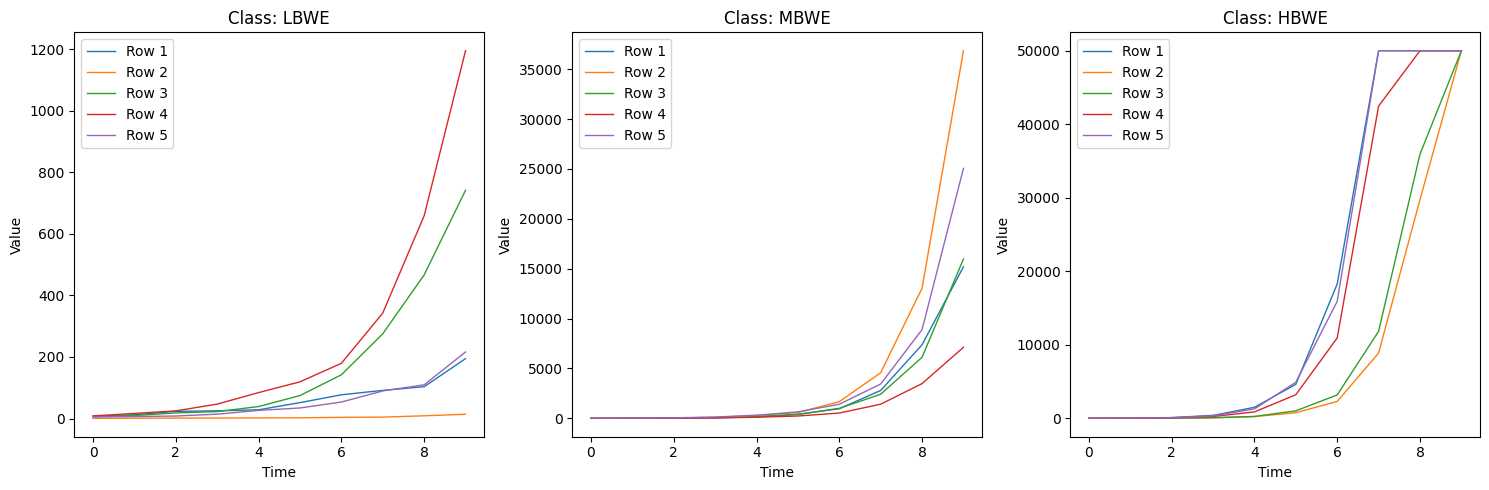

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = 3
class_names = ['LBWE', 'MBWE', 'HBWE']
samples_per_class = 30
matrix_size = (5, 10)
dataset = []
labels = []
for class_idx in range(num_classes):
    class_data = np.zeros((samples_per_class, *matrix_size))

    for sample_idx in range(samples_per_class):
        matrix = np.eye(*matrix_size)

        for row in range(matrix_size[0]):
            matrix[row, 0] = np.random.rand() * 10  # Random

            for col in range(1, matrix_size[1]):
                if class_idx == 0:
                    factor = 1 + np.random.rand()
                elif class_idx == 1:
                    factor = 2 + np.random.rand()
                elif class_idx == 2:
                    factor = 3+ np.random.rand()
                value = matrix[row, col - 1] * factor
                matrix[row, col] = min(value, 50000)

        class_data[sample_idx] = matrix

    dataset.append(class_data)
    labels.extend([class_names[class_idx]] * samples_per_class)

labels = np.array(labels)

fig, axes = plt.subplots(2, num_classes, figsize=(15, 8))

for class_idx in range(num_classes):
    class_data = dataset[class_idx]
    sample_idx = np.random.randint(samples_per_class)
    sample_matrix = class_data[sample_idx]

    ratio_matrix = sample_matrix[:, 1:] / sample_matrix[:, :-1]

    ax1 = axes[0, class_idx]
    im = ax1.imshow(sample_matrix, aspect='auto', cmap='viridis')
    plt.colorbar(im, ax=ax1)
    ax1.set_title(f"Matrix - Class: {class_names[class_idx]}")
    ax1.set_xlabel("Columns")
    ax1.set_ylabel("Rows")

    ax2 = axes[1, class_idx]
    for row in range(matrix_size[0]):
        ax2.plot(range(1, matrix_size[1]), ratio_matrix[row], linewidth=1.5, label=f"Row {row+1}")
    ax2.set_title(f"Ratios - Class: {class_names[class_idx]}")
    ax2.set_xlabel("Time (Columns)")
    ax2.set_ylabel("Ratio of Consecutive Values")
    ax2.legend(loc="best")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))

for class_idx in range(num_classes):
    class_data = dataset[class_idx]
    sample_idx = np.random.randint(samples_per_class)
    sample_matrix = class_data[sample_idx]

    ax = axes[class_idx]
    for row in range(matrix_size[0]):
        ax.plot(range(matrix_size[1]), sample_matrix[row], linewidth=1, label=f"Row {row+1}")
    ax.set_title(f"Class: {class_names[class_idx]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.legend(loc="best")
plt.tight_layout()
plt.show()

